## Useful Links

- <a href="https://medium.com/towards-artificial-intelligence/calculating-simple-linear-regression-and-linear-best-fit-an-in-depth-tutorial-with-math-and-python-804a0cb23660">Calculating Simple Linear Regression and Linear Best Fit an In-depth Tutorial with Math and Python</a>
- <a href="https://scikit-learn.org/stable/tutorial/index.html">scikit-learn Tutorials</a>
- <a href="https://medium.com/@amitg0161/sklearn-linear-regression-tutorial-with-boston-house-dataset-cde74afd460a">Sklearn Linear Regression Tutorial with Boston House Dataset</a>
- <a href="https://www.dataquest.io/blog/sci-kit-learn-tutorial/">Scikit-learn Tutorial: Machine Learning in Python</a>
- <a href="https://debuggercafe.com/image-classification-with-mnist-dataset/">Image Classification with MNIST Dataset</a>
- <a href="https://davidburn.github.io/notebooks/mnist-numbers/MNIST%20Handwrititten%20numbers/">MNIST handwritten number identification</a>

# <font color="red">Scikit-Learn</font>

- Scikit-learn is a free machine learning library for Python. 
- Provides a selection of efficient tools for machine learning and statistical modeling including: 
     - **Classification:** Identifying which category an object belongs to. Example: Spam detection
     - **Regression:** Predicting a continuous variable based on relevant independent variables. Example: Stock price predictions
     - **Clustering:** Automatic grouping of similar objects into different clusters. Example: Customer segmentation 
     - **Dimensionality Reduction:** Seek to reduce the number of input variables in training data by preserving the salient relationships in the data
- Features various algorithms like support vector machine, random forests, and k-neighbours.
- Supports Python numerical and scientific libraries like NumPy and SciPy.


Some popular groups of models provided by scikit-learn include:

- **Clustering:** Group unlabeled data such as KMeans.
- **Cross Validation:** Estimate the performance of supervised models on unseen data.
- **Datasets:** for test datasets and for generating datasets with specific properties for investigating model behavior.
- **Dimensionality Reduction:** Reduce the number of attributes in data for summarization, visualization and feature selection such as Principal component analysis.
- **Ensemble Methods:** Combine the predictions of multiple supervised models.
- **Feature Extraction:** Define attributes in image and text data.
- **Feature Selection:** Identify meaningful attributes from which to create supervised models.
- **Parameter Tuning:** Get the most out of supervised models.
- **Manifold Learning:** Summarize and depicting complex multi-dimensional data.
- **Supervised Models:** A vast array not limited to generalized linear models, discriminate analysis, naive bayes, lazy methods, neural networks, support vector machines and decision trees.
- **Unsupervised Learning Algorithms:** − They include clustering, factor analysis, PCA (Principal Component Analysis), unsupervised neural networks.


![fig_sckl](https://ulhpc-tutorials.readthedocs.io/en/latest/python/advanced/scikit-learn/images/scikit.png)
Image Source: ulhpc-tutorials.readthedocs.io

## Package Requirements

- Numpy
- scipy
- matplotlib
- pandas
- scikit-learn
- seaborn

In [1]:
%matplotlib inline
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [2]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# <font color="blue">Numerical Data</font>

## <font color="red">Boston Dataset</font>
- Contains information about different houses in Boston.
- There are 506 samples and 13 feature variables in this dataset. 
- Maintained at Carnegie Mellon University.
- <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/housing/">This is a copy of UCI ML housing dataset</a>.

We want to predict the value of prices of the house using the given features. 

### Obtain the Dataset

In [3]:
from sklearn.datasets import load_boston
print(sklearn.__version__)
boston_data = load_boston()

1.1.3


c:\Users\duc\.conda\envs\anhkun\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

In [4]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Features of the Dataset

In [5]:
print("Keys: ", boston_data.keys())

Keys:  dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [6]:
print("Shape: ", boston_data.data.shape)

Shape:  (506, 13)


In [7]:
print("Feature Names: ", boston_data.feature_names)

Feature Names:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


#### Attribute Information:
| Acronym | Description |
| --- | --- |
| **CRIM** |    Per capita crime rate by town |
|**ZN** |   Proportion of residential land zoned for lots over 25,000 sq.ft. |
| **INDUS** | Proportion of non-retail business acres per town |
| **CHAS** |  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
| **NOX** |  Nitric oxides concentration (parts per 10 million) |
| **RM** |    Average number of rooms per dwelling |
| **AGE** |   roportion of owner-occupied units built prior to 1940 |
| **DIS** |  weighted distances to five Boston employment centres |
| **RAD** |   index of accessibility to radial highways |
| **TAX** |  full-value property-tax rate per \$10,000 |
| **PTRATIO** |  pupil-teacher ratio by town |
| **B** |       1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |
| **LSTAT** |    % lower status of the population |
| **MEDV** |    Median value of owner-occupied homes in $1000's |

## <font color="red">Extract Data</font>

**Pass the data into a Pandas dataframe**

In [8]:
bos_pd = pd.DataFrame(boston_data.data)
bos_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Relabel the columns using the Boston dataset feature names

In [9]:
bos_pd.columns = boston_data.feature_names
bos_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Add home prices to the Pandas dataframe

In [10]:
boston_data.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [11]:
print("Shape of the target data: ", boston_data.target.shape)

Shape of the target data:  (506,)


In [12]:
bos_pd['PRICE']=boston_data.target
bos_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Check the types of features:

In [13]:
bos_pd.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

## <font color="red">Exploratory Data Analysis</font>

- Important step before training the model. 
- We use statistical analysis and visualizations to understand the relationship of the target variable with other features.

#### Check Missing Values
It is a good practice to see if there are any missing values in the data. 

Count the number of missing values for each feature

In [14]:
bos_pd.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

#### Obtain basic statistics on the data

In [15]:
bos_pd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [16]:
bos_pd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


#### Distribution of the target variable

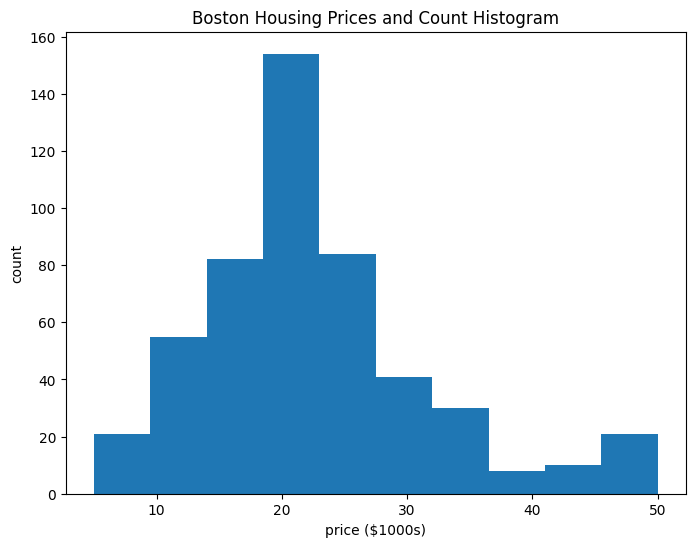

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(bos_pd['PRICE'])
plt.title('Boston Housing Prices and Count Histogram')
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.show()

C:\Users\duc\AppData\Local\Temp\ipykernel_4348\2260338045.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bos_pd['PRICE'])


<Axes: xlabel='PRICE', ylabel='Density'>

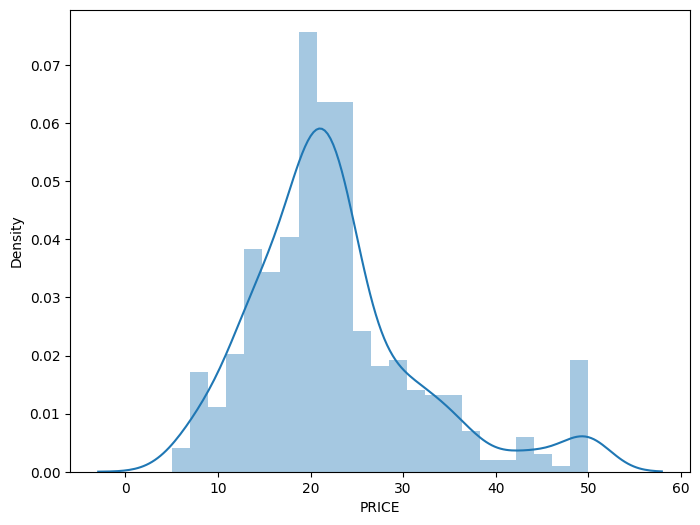

In [18]:
plt.figure(figsize=(8, 6))
sns.distplot(bos_pd['PRICE'])

From the above output we can see that the values of PRICE is normally distributed with some of the outliers.

#### Heatmap: Two-Dimensional Graphical Representation
- Represent the individual values that are contained in a matrix as colors.
- Create a correlation matrix that measures the linear relationships between the variables.

<Axes: >

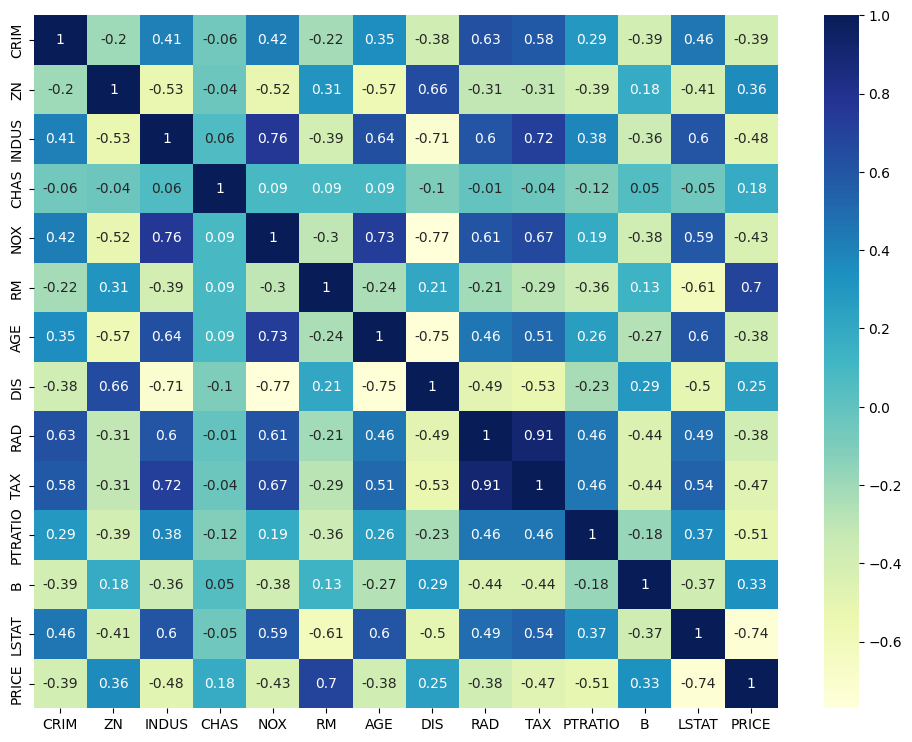

In [19]:
plt.figure(figsize=(12, 9))
correlation_matrix = bos_pd.corr().round(2)
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)

- **RM** has a strong positive correlation with **PRICE** (0.7) where as **LSTAThas** a high negative correlation with **PRICE** (-0.74).
- The features **RAD**, **TAX** have a correlation of 0.91. These feature pairs are strongly correlated to each other. This can affect the model. Same goes for the features **DIS** and **AGE** which have a correlation of -0.75.
- The predictor variables such as **CRIM**, **INDUS**, **NOX**, **Age**, **RAD**, **TAX**, **PTRATIO**, **LSTAT** have a negative correlation on the target. Increase of any of them leads to the decrease in the price of the housing.
- The predictor variables such as **ZN**, **RM**, **DIS**, **B** have good positive correlation with the target. Increase in any of them leads to the increase in the price of the house.

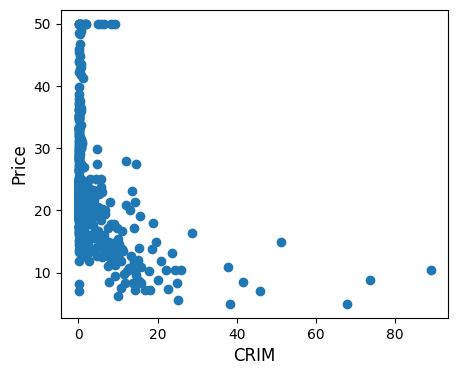

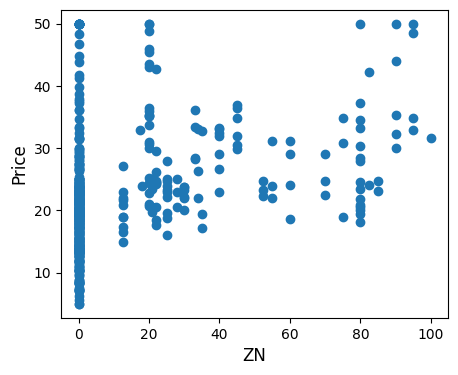

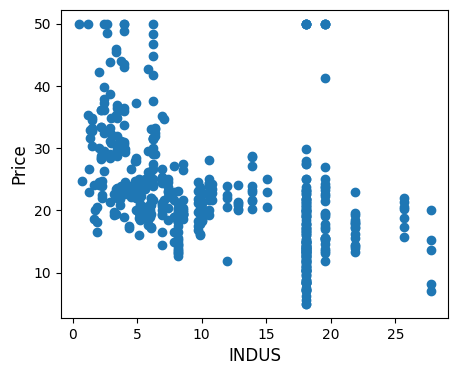

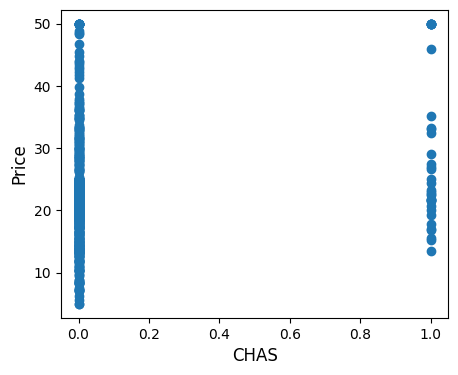

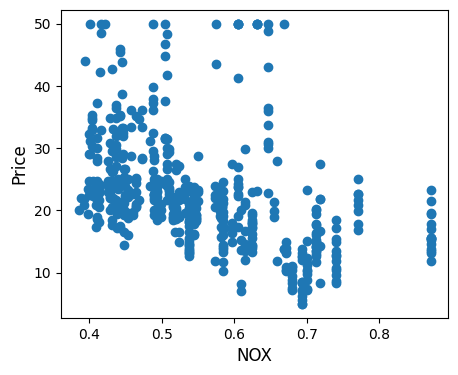

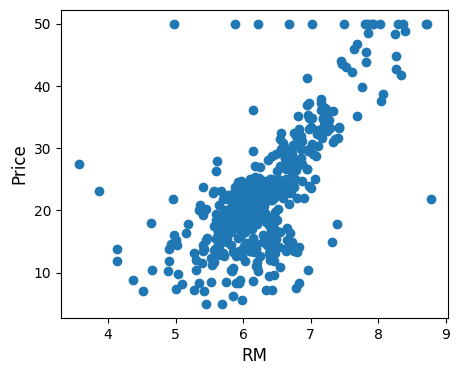

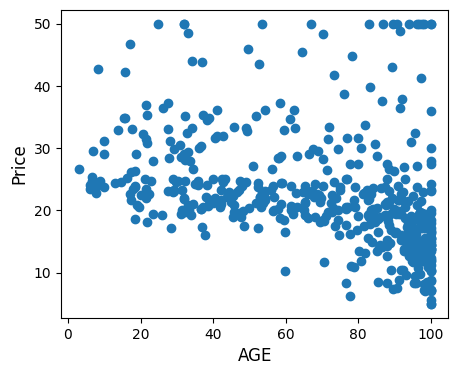

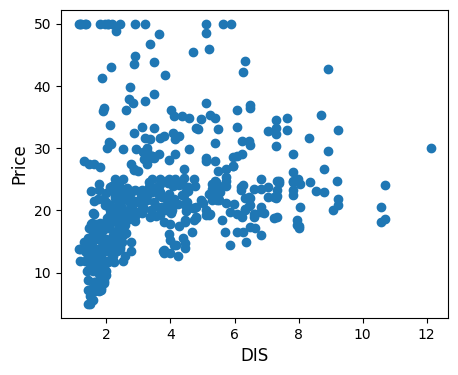

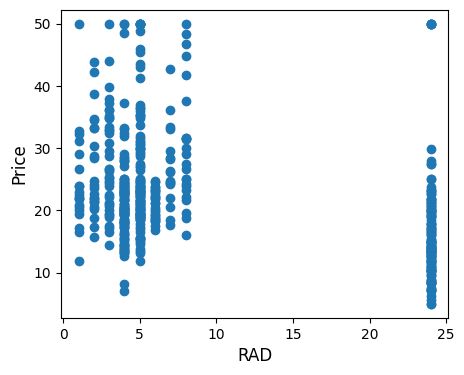

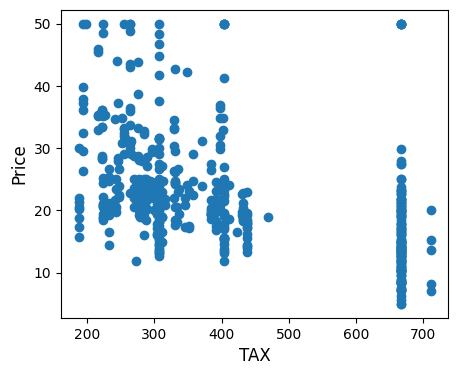

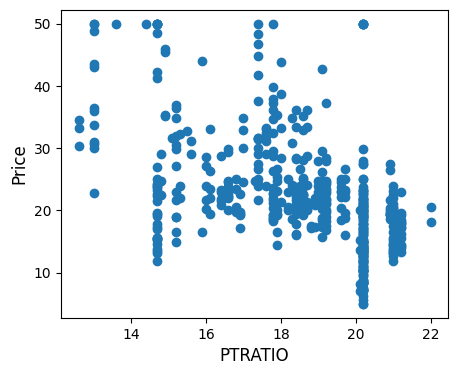

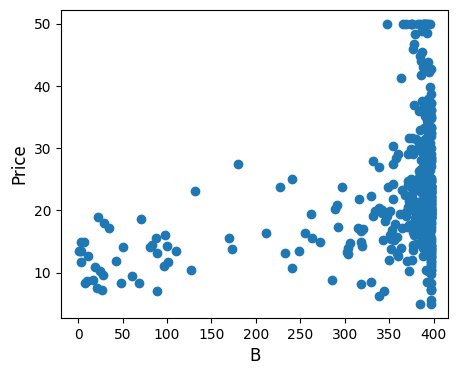

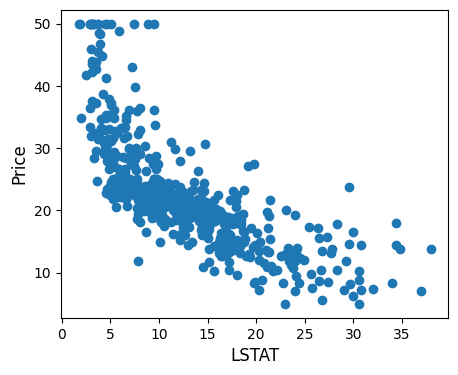

In [20]:
for feature_name in boston_data.feature_names:
    plt.figure(figsize=(5, 4))
    plt.scatter(bos_pd[feature_name], bos_pd['PRICE'])
    plt.ylabel('Price', size=12)
    plt.xlabel(feature_name, size=12)
plt.show()

- The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
- The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

Based on the above observations we will plot an `lmplot` between **RM** and **PRICE** to see the relationship between the two more clearly.

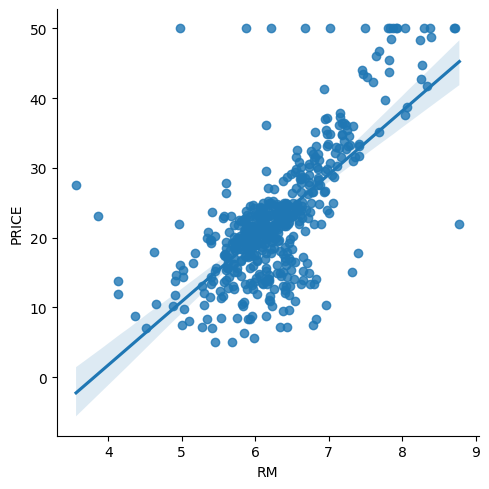

In [21]:
sns.lmplot(x = 'RM', y = 'PRICE', data = bos_pd)

## <font color="blue">Model Selection Process</font>

![fig_skl](https://miro.medium.com/max/1400/1*LixatBxkewppAhv1Mm5H2w.jpeg)
Image Source: Christophe Bourguignat

- A Machine Learning algorithm needs to be trained on a set of data to learn the relationships between different features and how these features affect the target variable. 
- We need to divide the entire data set into two sets:
    + Training set on which we are going to train our algorithm to build a model. 
    + Testing set on which we will test our model to see how accurate its predictions are.
    
Before we create the two sets, we need to identify the algorithm we will use for our model.
We can use the `machine_learning_map` map (shown at the top of this page) as a cheat sheet to shortlist the algorithms that we can try out to build our prediction model. Using the checklist let’s see under which category our current dataset falls into:
- We have 506 samples: >50? (**Yes**)
- Are we predicting a category? (**No**)
- Are we predicting a quantity? (**Yes**)

Based on the checklist that we prepared above and going by the `machine_learning_map` we can try out **regression methods** such as:

- Linear Regression 
- Lasso
- ElasticNet Regression
- Ridge Regression: 
- K Neighbors Regressor
- Decision Tree Regressor
- Simple Vector Regression (SVR)
- Ada Boost Regressor
- Gradient Boosting Regressor
- Random Forest Regression
- Extra Trees Regressor

Check the following documents on regresssion: 
<a href="https://scikit-learn.org/stable/supervised_learning.html">Supervised learning--scikit-learn</a>,
<a href="https://developer.ibm.com/technologies/data-science/tutorials/learn-regression-algorithms-using-python-and-scikit-learn/">Learn regression algorithms using Python and scikit-learn</a>,
<a href="https://www.pluralsight.com/guides/non-linear-">Non-Linear Regression Trees with scikit-learn</a>.

## <font color="red">Simple Linear Model</font>
- It is difficult to visualize the multiple features.
- We want to predict the house price with just one variable and then move to the regression with all features.
- Because **RM** shows positive correlation with the **House Prices**, we will use **RM** for the model.

In [22]:
X_rooms = bos_pd.RM
y_price = bos_pd.PRICE
print(X_rooms.shape)
print(y_price.shape)

X_rooms = np.array(X_rooms).reshape(-1,1)
y_price = np.array(y_price).reshape(-1,1)

print(X_rooms.shape)
print(y_price.shape)

(506,)
(506,)
(506, 1)
(506, 1)


#### Splitting the data into training and testing sets
- We split the data into training and testing sets. 
- We train the model with 80% of the samples and test with the remaining 20%. 
- We do this to assess the model’s performance on unseen data.

In [23]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = \
             train_test_split(X_rooms, y_price, test_size = 0.2, random_state=5)

print(X_train_1.shape)
print(Y_train_1.shape)
print(X_test_1.shape)
print(Y_test_1.shape)

(404, 1)
(404, 1)
(102, 1)
(102, 1)


#### Training and testing the model
- We use scikit-learn’s LinearRegression to train our model on both the training and check it on the test sets.
- We check the model performance on the train dataset.

In [42]:
reg_1 = LinearRegression()
reg_1.fit(X_train_1, Y_train_1)

y_train_predict_1 = reg_1.predict(X_train_1)
rmse = (np.sqrt(metrics.mean_squared_error(Y_train_1, y_train_predict_1)))
r2 = round(reg_1.score(X_train_1, Y_train_1),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 6.972277149440585
R2 score is 0.43




#### Model Evaluation for Test Set

In [25]:
y_pred_1 = reg_1.predict(X_test_1)
rmse = (np.sqrt(metrics.mean_squared_error(Y_test_1, y_pred_1)))
r2 = round(reg_1.score(X_test_1, Y_test_1),2)

print("The model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))

The model performance for training set
--------------------------------------
Root Mean Squared Error: 4.895963186952216
R^2: 0.69


The coefficient of determination: 1 is perfect prediction

In [26]:
print('Coefficient of determination: {:.4f}'.format(metrics.r2_score(Y_test_1, y_pred_1)))

Coefficient of determination: 0.6938


#### 45-Degree Plot

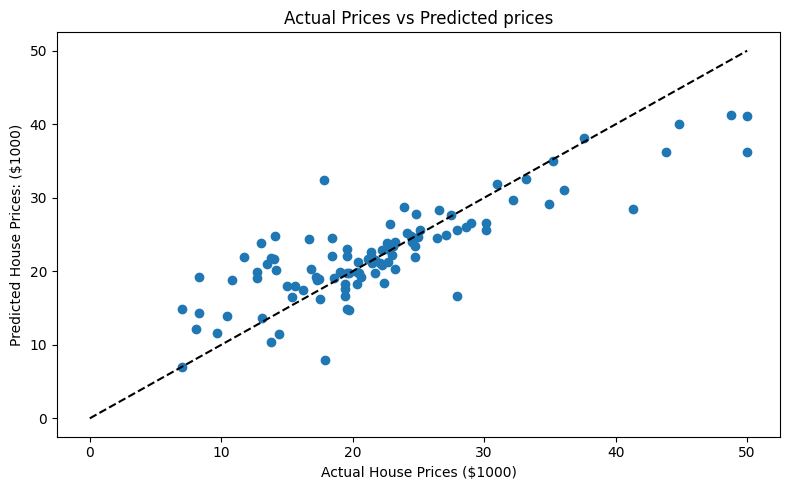

In [27]:
plt.figure(figsize=(8, 5))
plt.scatter(Y_test_1, y_pred_1)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices: ($1000)")
#plt.xticks(range(0, int(max(y_test)),2))
#plt.yticks(range(0, int(max(y_test)),2))
plt.title("Actual Prices vs Predicted prices")
plt.tight_layout()

## <font color="red">Linear Regression Model with All Variables</font>
- We want to create a model considering all the features in the dataset.

#### Create the Model

In [28]:
X = bos_pd.drop('PRICE', axis = 1)
y = bos_pd['PRICE']

- Use the `train_test_split` to split the data into random train and test subsets.
- Everytime you run it without specifying `random_state`, you will get a different result.
- If you use `random_state=some_number`, then you can guarantee the split will be always the same.
- It doesn't matter what the value of `random_state` is:  42, 0, 21, ...
- This is useful if you want reproducible results.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

The linear regression model:

In [30]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

#### Model Evaluation for Training Set

In [31]:
y_train_predict = reg_all.predict(X_train)

In [32]:
rmse = (np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.6520331848801675
R2 score is 0.75




#### Model Evaluation for Test Set

In [33]:
y_pred = reg_all.predict(X_test)

In [34]:
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = round(reg_all.score(X_test, y_test),2)

print("The model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))

The model performance for training set
--------------------------------------
Root Mean Squared Error: 4.928602182665371
R^2: 0.67


The coefficient of determination: 1 is perfect prediction

In [35]:
print('Coefficient of determination: {:.4f}'.format(metrics.r2_score(y_test, y_pred)))

Coefficient of determination: 0.6688


#### Error Distribution

C:\Users\duc\AppData\Local\Temp\ipykernel_4348\1236769786.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred);


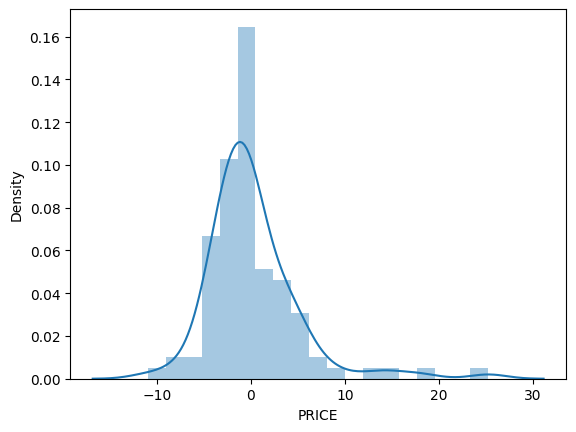

In [36]:
sns.distplot(y_test - y_pred);

#### 45-Degree Plot

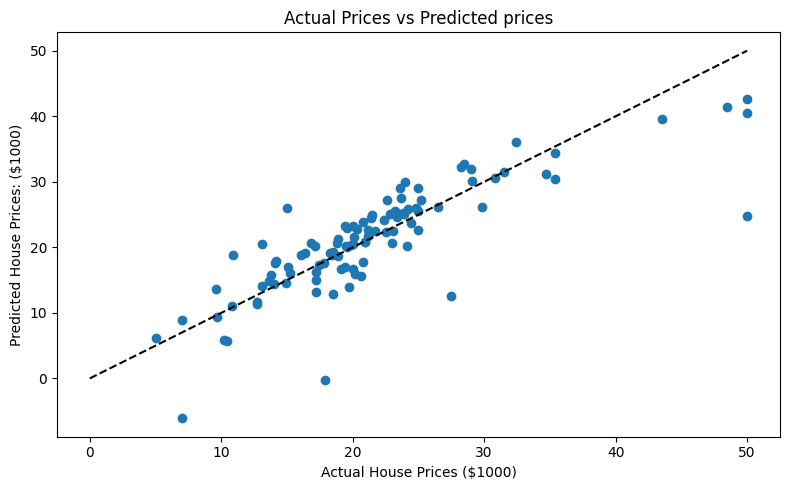

In [37]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices: ($1000)")
#plt.xticks(range(0, int(max(y_test)),2))
#plt.yticks(range(0, int(max(y_test)),2))
plt.title("Actual Prices vs Predicted prices")
plt.tight_layout()

In [38]:
print("RMS: %r " % np.sqrt(np.mean((y_test - y_pred) ** 2)))

RMS: 4.928602182665371 


In [41]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2 = df1.head(15)
df2

,Actual,Predicted
173,23.6,28.996724
274,32.4,36.025565
491,13.6,14.816944
72,22.8,25.031979
452,16.1,18.769880
76,20.0,23.254429
316,17.8,17.662538
140,14.0,14.341190
471,19.6,23.013207
500,16.8,20.632456


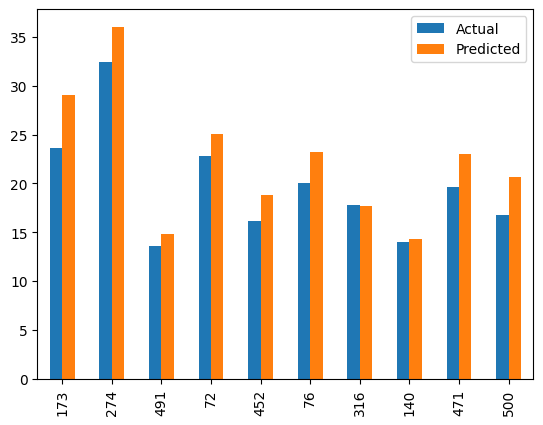

In [40]:
df2.plot(kind='bar')